In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv('./dataset/daily-total-female-births-CA.csv', parse_dates=['date'], index_col='date')
df.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [14]:
df.shape

(365, 1)

In [15]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [17]:
df.isnull().sum()

births    0
dtype: int64

<AxesSubplot:xlabel='date'>

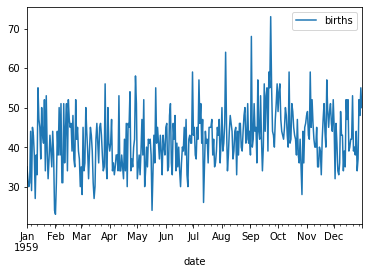

In [19]:
df.plot()

<AxesSubplot:xlabel='date'>

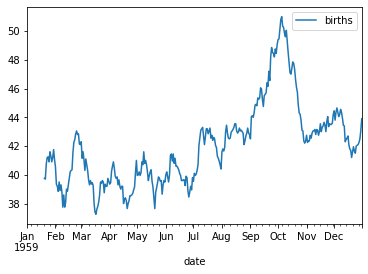

In [26]:
birth_mean = df.rolling(window=20).mean()
birth_mean.plot()

In [29]:
birth_df = df.copy(deep=True)
birth_df['births + 1'] = df['births'].shift(1)
birth_df

,births,births + 1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
...,...,...
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0


In [36]:
from sklearn.metrics import mean_squared_error

birth_df.iloc[0, 1] = 32
birth_error = mean_squared_error(birth_df['births'], birth_df['births + 1'])
birth_error

84.01643835616439

ARIMA - Autoregressive (p) Integreted (d) Moving Average (q)

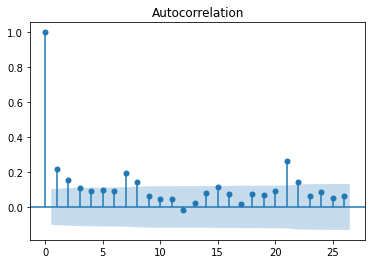

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot_acf is to identify parameter Q
# ARIMA (p, d, q)

_ = plot_acf(df)

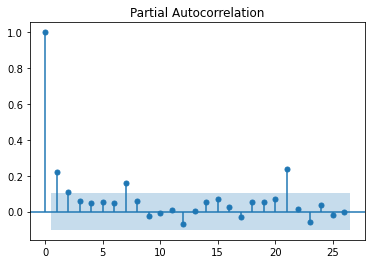

In [39]:
_ = plot_pacf(df) # to identify the value of p

p = 2, 3 ; d = 0 ; q = 3, 4

In [40]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=.2,
    random_state=1
)

train_df

,births
date,
1959-03-20,36
1959-08-16,45
1959-09-04,42
1959-03-23,43
1959-12-06,33
...,...
1959-07-23,42
1959-09-13,42
1959-03-14,31


In [45]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_df, order=(2,1,3))
model_fit = model.fit()

C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\Angga\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintai

In [47]:
model_fit.aic

1994.0862826687357

In [52]:
birth_forcast = model_fit.forecast(steps=73)[0]

In [53]:
birth_forcast

array([43.42421191, 41.2343572 , 42.29665093, 41.97651213, 41.85964616,
       42.19072625, 41.79165997, 42.17092085, 41.85400033, 42.09360256,
       41.92742454, 42.03126779, 41.97416169, 41.99811512, 41.9944328 ,
       41.98633419, 41.9989789 , 41.98512027, 41.99714463, 41.98719223,
       41.99411401, 41.98919093, 41.99181743, 41.99020791, 41.99049774,
       41.9903856 , 41.98982858, 41.99010245, 41.98945632, 41.98965008,
       41.9891624 , 41.98917822, 41.98885419, 41.98873655, 41.98851157,
       41.98832674, 41.98814282, 41.98793642, 41.98776079, 41.98755427,
       41.98737443, 41.98717382, 41.98698799, 41.98679258, 41.98660268,
       41.98641019, 41.98621838, 41.98602699, 41.98583466, 41.98564342,
       41.98545117, 41.98525974, 41.9850677 , 41.98487608, 41.98468419,
       41.98449245, 41.98430065, 41.98410886, 41.98391709, 41.98372528,
       41.98353352, 41.98334171, 41.98314994, 41.98295814, 41.98276636,
       41.98257457, 41.98238279, 41.982191  , 41.98199921, 41.98

In [54]:
test_df

,births
date,
1959-12-21,53
1959-07-05,45
1959-06-17,30
1959-06-25,30
1959-11-11,40
...,...
1959-06-29,41
1959-12-03,46
1959-04-17,42


In [56]:
np.sqrt(mean_squared_error(birth_forcast, test_df))

7.580596930047185

<AxesSubplot:xlabel='date'>

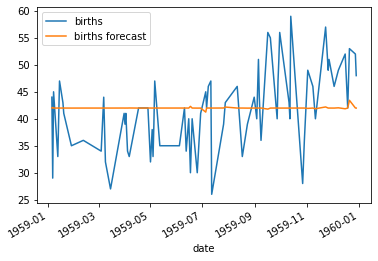

In [64]:
comp_df = test_df.copy(deep=True)
forcast_series = pd.Series(birth_forcast, index=test_df.index, name='births forecast')

pd.concat([comp_df['births'], forcast_series], axis='columns').plot()